<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#effective-pandas-(matt-harrison)" data-toc-modified-id="effective-pandas-(matt-harrison)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>effective pandas (matt harrison)</a></span><ul class="toc-item"><li><span><a href="#Chapter-5---Series-Introduction" data-toc-modified-id="Chapter-5---Series-Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Chapter 5 - Series Introduction</a></span><ul class="toc-item"><li><span><a href="#masks" data-toc-modified-id="masks-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>masks</a></span></li><li><span><a href="#categorical-data" data-toc-modified-id="categorical-data-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>categorical data</a></span></li></ul></li><li><span><a href="#Chapter-6---Series-Deep-dive" data-toc-modified-id="Chapter-6---Series-Deep-dive-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Chapter 6 - Series Deep dive</a></span><ul class="toc-item"><li><span><a href="#misc-eda-on-series" data-toc-modified-id="misc-eda-on-series-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>misc eda on series</a></span></li><li><span><a href="#chaining" data-toc-modified-id="chaining-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>chaining</a></span></li><li><span><a href="#aggregate-methods" data-toc-modified-id="aggregate-methods-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>aggregate methods</a></span><ul class="toc-item"><li><span><a href="#chaining-aggregate--methods-&amp;-count/percentage-trick" data-toc-modified-id="chaining-aggregate--methods-&amp;-count/percentage-trick-1.2.3.1"><span class="toc-item-num">1.2.3.1&nbsp;&nbsp;</span>chaining aggregate  methods &amp; count/percentage trick</a></span></li><li><span><a href="#using-.agg-to-do-multiple-aggs" data-toc-modified-id="using-.agg-to-do-multiple-aggs-1.2.3.2"><span class="toc-item-num">1.2.3.2&nbsp;&nbsp;</span>using .agg to do multiple aggs</a></span></li></ul></li><li><span><a href="#checking-for,-and-converting,-types-in-a-column" data-toc-modified-id="checking-for,-and-converting,-types-in-a-column-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>checking for, and converting, types in a column</a></span></li></ul></li><li><span><a href="#Manipulation-Methods" data-toc-modified-id="Manipulation-Methods-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Manipulation Methods</a></span></li><li><span><a href="#Eclectic-things-from-the-book" data-toc-modified-id="Eclectic-things-from-the-book-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Eclectic things from the book</a></span></li><li><span><a href="#creating-and-updating-a-column" data-toc-modified-id="creating-and-updating-a-column-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>creating and updating a column</a></span></li></ul></li></ul></div>

# effective pandas (matt harrison)

## Chapter 5 - Series Introduction

In [1]:
# test notebook : 2022-12-26 20:01:22
from yapf.yapflib.yapf_api import FormatCode
import pandas as pd
import numpy as np
from icecream import ic

### masks
useful for filtering
numpy can do similar filtering as pandas

In [2]:
# boolean masks in pandas:
ages = [42, 45, 17, 14, 9]
pandas_series = pd.array(ages)

# numpy_series.mean()
age_mask = pandas_series > 40
print("age_mask : {}".format(age_mask))

# applying mask:
print("ages above 40: {}".format(pandas_series[age_mask]))

age_mask : <BooleanArray>
[True, True, False, False, False]
Length: 5, dtype: boolean
ages above 40: <IntegerArray>
[42, 45]
Length: 2, dtype: Int64


### categorical data
benefits:

- Use less memory than strings
- Improve performance
- Can have an ordering
- Can perform operations on categories <--- this!!!
- Enforce membership on values”

In [3]:
# creating data which is categorized:
pant_sizes_category = pd.Series(['m', 'l', 'xs', 's', 'xl'], dtype='category')
# pant_sizes.cat.ordered

# more common: if we have data and we want to convert it to categories:
# say data:
pant_sizes_strings = pd.Series(['m', 'l', 'xs', 's', 'xl'])
ic(pant_sizes_strings)
# first we create our OWN type of the ordered categories:
size_type = pd.api.types.CategoricalDtype(
    categories=['xs', 's', 'm', 'l', 'xl'], ordered=True)

# then we apply it to the data.
pant_sizes_new_category = pant_sizes_strings.astype(size_type)
ic(pant_sizes_new_category)

ic| pant_sizes_strings: 0     m
                        1     l
                        2    xs
                        3     s
                        4    xl
                        dtype: object
ic| pant_sizes_new_category: 0     m
                             1     l
                             2    xs
                             3     s
                             4    xl
                             dtype: category
                             Categories (5, object): ['xs' < 's' < 'm' < 'l' < 'xl']


0     m
1     l
2    xs
3     s
4    xl
dtype: category
Categories (5, object): ['xs' < 's' < 'm' < 'l' < 'xl']

In [4]:
#filtering in a categorical series:
pant_sizes_new_category[pant_sizes_new_category >= 's']

0     m
1     l
3     s
4    xl
dtype: category
Categories (5, object): ['xs' < 's' < 'm' < 'l' < 'xl']

## Chapter 6 - Series Deep dive

In [5]:
import pandas as pd
# to avoid the CERT error:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
url = 'https://github.com/mattharrison/datasets/raw/master/data/vehicles.csv.zip'
df = pd.read_csv(url)
city_mpg = df.city08
highway_mpg = df.highway08


/var/folders/z9/jt4cn2td0gn40p7sh34cbzg80000gn/T/ipykernel_6394/7284540.py:6: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


### misc eda on series

In [6]:

# dunder methods are .__add__ etc. and standard methods such as add extend them
city_mpg.__add__(highway_mpg)
#vs
city_mpg.add(highway_mpg, fill_value=0) # will use 0 for the cells where the indices dont align to the other series

# dir(city_mpg) lists the attributes of an object
print("number of methods on the city_mpg object: {}".format(len(dir(city_mpg))))


number of methods on the city_mpg object: 420


### chaining

Basically, tack on the methods to the output of the last call (which is also an object) for legibility and not using middle variables

In [7]:
#bad way:
temp1 = city_mpg.add(highway_mpg)
temp2 = temp1.pow(3.33)
temp3 = temp2/2
final1 = temp3.mul(0.588)

#chaining way:
final2 = ((city_mpg
           .add(highway_mpg)
           .pow(3.33)
           /2)
           .mul(0.588)
         )

if final1.eq(final2).all:
    print("both series are equal")
else:
    print("series not equal!")
    
    
ic(final1.head(2))
ic(final2.head(2))
           

ic| final1.head(2): 0    87306.131074
                    1    10067.022154
                    dtype: float64
ic| final2.head(2): 0    87306.131074
                    1    10067.022154
                    dtype: float64


both series are equal


0    87306.131074
1    10067.022154
dtype: float64

### aggregate methods

- sum, count, etc
- collapse the series to a scalar
- important for managers/decision makes, to find trends in the data..
- we also jump ahead and show a hist plot.. its good to look at the the shape of the data upfront to derive surface insights

    **Exploring how the data feels like:** Here are some useful ones when exploring the shape and getting a feel of the data:

ic| city_mpg.mean(): 18.369045304297103
ic| city_mpg.median(): 17.0
ic| city_mpg.std(): 7.9058861707373005
ic| city_mpg.min(): 6
ic| city_mpg.max(): 150
ic| city_mpg.quantile(0.95): 27.0
ic| city_mpg.corr(highway_mpg): 0.9393654130640561
ic| normal_dist.skew(): -0.037784481721189686
ic| right_tail.skew(): 1.4215949099309269
ic| city_mpg.agg(func='hasnans'): False
ic| city_mpg.is_monotonic_increasing: False


total readings in city_mpg: 41144, unique ones: 105


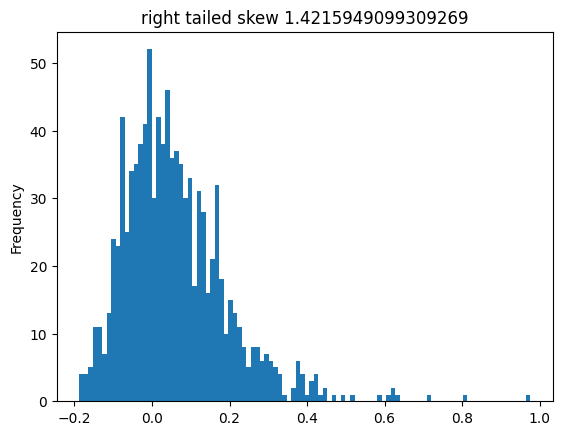

In [8]:
#standard stats methods are mean, standard dev, corr, min, max 
ic(city_mpg.mean())
ic(city_mpg.median())
ic(city_mpg.std())
ic(city_mpg.min())
ic(city_mpg.max())
ic(city_mpg.quantile(0.95))
ic(city_mpg.corr(highway_mpg)) # this is a garbage run, typically you would 
# stack up sorted or uniquely indexed data and then run the corr to see 
#if the two data points are corellated. e.g. tenure of employee vs employee attrition risk

#kurtosis is how much of the data is symmetrical around the middle
normal_dist = pd.Series(np.random.normal(0,1,1000))
ic(normal_dist.skew()) # this will be really small (almost zero) since for a normal distribution the 
#data is centered around the mean.
#now, lets draw a right tailed dist: (long right tail)
right_tail = pd.Series(np.random.gumbel(0, 0.1, 1000))
ic(right_tail.skew()) # this will be positive val: 
# distribution is a type of distribution in which most values are 
# clustered around the left tail of the distribution while the
# right tail of the distribution is longer
right_tail.plot(bins=100, kind="hist", title="right tailed skew {}".format(right_tail.skew()))


#data shape and holes etc 

#how many gaps does the data have nans = not a numbers?
ic(city_mpg.agg(func='hasnans'))


#is it increasing or decreasing monotonically (could be good for date)
ic(city_mpg.is_monotonic_increasing)

#how many are unique vs how many total?
print("total readings in city_mpg: {}, unique ones: {}"
      .format(city_mpg.count(), city_mpg.nunique()))


#### chaining aggregate  methods & count/percentage trick

- this will show simple examples on how methods including agg methods can be chained
- also the trick around doing a **count** that when you do a sum() on a boolean output series it counts all the Trues as 1s, so its a cool way of doing a count.
- the trick around a **percentage** is that when you do a mean() on a boolean output it calculates a percentage of the true (1) over the full # of values, so 1,1,0,0,1 is 3/5 = 60%


In [9]:
pct_cars_with_gas_mileage_gt_25mpg = (city_mpg
.gt(25)
.mul(100)
.mean())
ic(pct_cars_with_gas_mileage_gt_25mpg)

num_cars_with_gas_mileage_gt_25mpg = (city_mpg
                                     .gt(25)
                                     .sum())
ic(num_cars_with_gas_mileage_gt_25mpg)

ic| pct_cars_with_gas_mileage_gt_25mpg: 7.230701924946529
ic| num_cars_with_gas_mileage_gt_25mpg: 2975


2975

#### using .agg to do multiple aggs

- series.agg(...) can run multiple aggregations and print them all out
- agg allows you to use non pandas (and even your own) agg method



ic| city_mpg.agg(['mean',np.var,'skew']): mean    18.369045
                                          var     62.503036
                                          skew     7.705198
                                          Name: city08, dtype: float64


<AxesSubplot: ylabel='Frequency'>

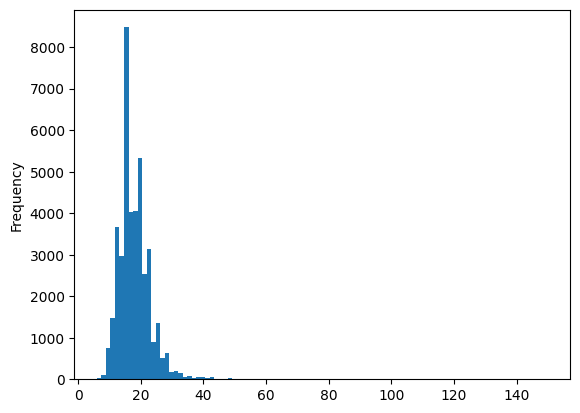

In [10]:
ic(city_mpg.agg(['mean',np.var,'skew']))

# note , a positive skew means its a right tailed dist. that makes sense 
# since more cars would have lower mileage and very few (expensive/uniqye) would have
# high mileage

city_mpg.plot.hist(bins=100)

### checking for, and converting, types in a column

- when you import say numerical data in a column (e.g. years in tenure), you dont want that to be casted as a weird type, otherwise you wont be able to do manipulation on it
- while pandas should automatically assess the type, you can force it too


In [11]:
city_mpg

0        19
1         9
2        23
3        10
4        17
         ..
41139    19
41140    20
41141    18
41142    18
41143    16
Name: city08, Length: 41144, dtype: int64

- note the dtype of int64 above for city_mpg. nice and clean.... and unrealistic

now let's take a row with dirty data

In [12]:
dirty_data_tenure = pd.Series([5,2.4,"3.4 yrs", 8.9, '5.1y'])
ic(dirty_data_tenure.agg(['hasnans']))
dirty_data_tenure

ic| dirty_data_tenure.agg(['hasnans']): hasnans    False
                                        dtype: bool


0          5
1        2.4
2    3.4 yrs
3        8.9
4       5.1y
dtype: object

- the dtype is object which should give you a clue that pandas sees some non integer values in here (if you can't easily inspect the data, say because it has 10000 values and they dont print nicely like the `dirty_data_tenure` above):
- another clue is hasnans aggregate method (has not a numbers)

here's how you can identify the non real number values:
(the ~ is the inverter I guess)


In [13]:
ic(dirty_data_tenure[~dirty_data_tenure.agg([np.isreal]).all(1)])


ic| dirty_data_tenure[~dirty_data_tenure.agg([np.isreal]).all(1)]: 2    3.4 yrs
                                                                   4       5.1y
                                                                   dtype: object


2    3.4 yrs
4       5.1y
dtype: object

- another trick to easily find where the data is not float is to try to to convert it!

In [14]:
try:
  dirty_data_tenure.astype('Float64')
except Exception as e: 
    print(e)


could not convert string to float: '3.4 yrs'


In [15]:
#how to check memory usage of a series and optimize it by changing the type
ic(city_mpg.dtype)
ic(city_mpg.memory_usage())
ic(city_mpg
 .astype('Int16')
 .memory_usage())


ic| city_mpg.dtype: dtype('int64')
ic| city_mpg.memory_usage(): 329280
ic| city_mpg
    .astype('Int16')
    .memory_usage(): 123560


123560

- converting string to categorical variables
- makes the string series more efficient
- you can make ordered categories as well (shown earlier in scratchpad)

2022-12-29 21:22:28 

In [16]:
city_mpg_str = city_mpg.astype('str')
ic(city_mpg_str.memory_usage())

city_mpg_str_as_category = city_mpg_str.astype('category')
ic(city_mpg_str_as_category.memory_usage())

ic| city_mpg_str.memory_usage(): 329280
ic| city_mpg_str_as_category.memory_usage(): 46280


46280

## Manipulation Methods

- summarizing data ( np.where(), np.select())
- missing & interpolating data
- sorting
- removing duplicates (.drop() )
- ranking data (.rank())
- replacing data (.replace())
- binning data (.cut, qcut) (but .plot allows you to specify bins for hist graphs)


In [17]:
# code for manipulation here

## Eclectic things from the book

These are things that caught my eye in terms of relevance to TCM. I've leaved through the book and prioritized the chapters based on what I need to learn.

**pandas foundational concepts**
- (M) Dates in the index
- (M) Indexing (b/c I know about it, so should whiz thru it)
- (M) missing and duplicated data (should be fast)
- (L) String (go fast thru it, check out regexp)
- (L) math functions
- (L) column types (.info() is useful)

**data transformation**
- interesting functions:
    - .assign()
    - .rolling()
    - .query()
    - .pivot_table(), groupby(), crosstab()
    
- (H) similarities with series and DF (tweak, heatmap seaborn)
- (H) creating and updating column (bit complicated but important for EDA)
- (H) filtering and indexing (.query())
- (H) reshaping by pivoting and grouping (.pivot_table(), groupby(), crosstab())
- (H) cross-tab deep dive
- (H) melting, transposing and stacking data (tidydata concepts)
- (M) looping and aggregation (shoudl be fast)
- (M) working with time series (time filtering, rolling avg and plotting)
- (M) joining dataframes (merge/concat/join methods)

**data visualization**
- (H) styling dataframes (coloring, sparklines, etc, stuff not that clear in tableau)
- (H) plotting with DF
- (M) plotting with series (fast, kde looks interesting)


**advanced topics**
- (M) reshaping using dummy columns (complicated, mostly doing categorical for numeric)
- (L) debugging pandas (a little advanced, but some good ideas for when I have to teach and look at other peoples data)
- (L) more aggegrations (more complex, transform, filter operations)





In [18]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/dirtydevil.txt'
df = pd.read_csv(url, skiprows=lambda num: num <34 or num == 35,
                 sep='\t')

def tweak_river(df_):
    return (df_
 .assign(datetime=pd.to_datetime(df_.datetime))
 .rename(columns={'144166_00060': 'cfs',
                  '144167_00065': 'gage_height'})
 .set_index('datetime')
)

#I'll come back to this code later

/var/folders/z9/jt4cn2td0gn40p7sh34cbzg80000gn/T/ipykernel_6394/3165285041.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, skiprows=lambda num: num <34 or num == 35,


## creating and updating a column

- the goal is to avoid the for loop for each row and use cool functions like assign and lambda..

In [19]:
import pandas as pd
url = 'https://github.com/mattharrison/datasets/raw/master/data/'\
      '2020-jetbrains-python-survey.csv'
jb = pd.read_csv(url)
jb.columns

/var/folders/z9/jt4cn2td0gn40p7sh34cbzg80000gn/T/ipykernel_6394/2451077279.py:4: DtypeWarning: Columns (152) have mixed types. Specify dtype option on import or set low_memory=False.
  jb = pd.read_csv(url)


Index(['is.python.main', 'other.lang.None', 'other.lang.Java',
       'other.lang.JavaScript', 'other.lang.C/C++', 'other.lang.PHP',
       'other.lang.C#', 'other.lang.Ruby', 'other.lang.Bash / Shell',
       'other.lang.Objective-C',
       ...
       'job.role.Technical support', 'job.role.Data analyst',
       'job.role.Business analyst', 'job.role.Team lead',
       'job.role.Product manager', 'job.role.CIO / CEO / CTO',
       'job.role.Systems analyst', 'job.role.Other', 'age', 'country.live'],
      dtype='object', length=264)

In [20]:
# cleaning columns

import collections
counter = collections.defaultdict(list)
for col in sorted(jb.columns):
    period_count = col.count('.')
    if period_count >= 2:
        part_end = 2
    else:
        part_end = 1
    parts = col.split('.')[:part_end]
    counter['.'.join(parts)].append(col)
uniq_cols = []
for cols in counter.values():
    if len(cols) == 1:
        uniq_cols.extend(cols)

uniq_cols

['age',
 'are.you.datascientist',
 'company.size',
 'country.live',
 'employment.status',
 'first.learn.about.main.ide',
 'how.often.use.main.ide',
 'ide.main',
 'is.python.main',
 'job.team',
 'main.purposes',
 'missing.features.main.ide',
 'nps.main.ide',
 'python.years',
 'python2.version.most',
 'python3.version.most',
 'several.projects',
 'team.size',
 'use.python.most',
 'years.of.coding']

In [21]:
(jb
 [uniq_cols]
 .rename(columns=lambda c: c.replace('.', '_'))
 .age
 .value_counts(dropna=False)
)

NaN            29701
21–29           9710
30–39           7512
40–49           3010
18–20           2567
50–59           1374
60 or older      588
Name: age, dtype: int64

In [22]:
(jb
 [uniq_cols]
 .rename(columns=lambda c: c.replace('.', '_'))
 .assign(age=lambda df_:df_.age
    .str.slice(0,2)
    .astype(float)
    .astype('Int64'))
)

,age,are_you_datascientist,company_size,country_live,employment_status,first_learn_about_main_ide,how_often_use_main_ide,ide_main,is_python_main,job_team,main_purposes,missing_features_main_ide,nps_main_ide,python_years,python2_version_most,python3_version_most,several_projects,team_size,use_python_most,years_of_coding
0,30,NaN,Just me,NaN,Partially employed by a company / organization,Conference / User Group,Weekly,PyCharm Community Edition,Yes,Work as an external consultant or trainer,For work,"No, it has all the features I need",3.0,3–5 years,NaN,Python 3_7,"Yes, I work on many different projects",NaN,NaN,1–2 years
1,21,Yes,"More than 5,000",India,Fully employed by a company / organization,School / University,Daily,VS Code,Yes,Work in a team,Both for work and personal,"No, it has all the features I need",8.0,3–5 years,NaN,Python 3_6,"Yes, I work on one main and several side projects",2-7 people,Software prototyping,3–5 years
2,30,No,"More than 5,000",United States,Fully employed by a company / organization,Friend / Colleague,Daily,Vim,Yes,Work on your own project(s) independently,Both for work and personal,"No, it has all the features I need",10.0,3–5 years,NaN,Python 3_6,"Yes, I work on one main and several side projects",NaN,DevOps / System administration / Writing autom...,3–5 years
3,<NA>,NaN,NaN,NaN,NaN,Friend / Colleague,Daily,PyCharm Professional Edition,Yes,NaN,Both for work and personal,Yes – Please list:,10.0,11+ years,NaN,Python 3_8,"Yes, I work on many different projects",NaN,Web development,11+ years
4,21,NaN,NaN,Italy,Student,Search engines,Daily,VS Code,Yes,Work on your own project(s) independently,"For personal, educational or side projects","No, it has all the features I need",10.0,1–2 years,NaN,Python 3_8,"Yes, I work on one main and several side projects",NaN,Web development,Less than 1 year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54457,21,No,2–10,Russian Federation,Fully employed by a company / organization,School / University,Daily,Vim,Yes,Work on your own project(s) independently,Both for work and personal,"No, it has all the features I need",10.0,6–10 years,NaN,Python 3_6,"Yes, I work on many different projects",NaN,Data analysis,1–2 years
54458,<NA>,No,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Both for work and personal,NaN,NaN,3–5 years,NaN,Python 3_7,NaN,NaN,Web development,1–2 years
54459,21,NaN,Just me,Russian Federation,Self-employed (a person earning income directl...,Friend / Colleague,Daily,PyCharm Professional Edition,Yes,Work in a team,Both for work and personal,"No, it has all the features I need",10.0,3–5 years,NaN,Python 3_7,"Yes, I work on many different projects",2-7 people,Web development,6–10 years
54460,30,Yes,51–500,Spain,Fully employed by a company / organization,Search engines,Daily,Other,Yes,Work on your own project(s) independently,Both for work and personal,Yes – Please list:,3.0,6–10 years,NaN,Python 3_7,"Yes, I work on many different projects",NaN,Data analysis,3–5 years
